# Data Analysis
Importing Libraries

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import numpy as np
import scipy

Importing data from csv

In [3]:
data = pd.read_csv("tsa-data/age_std_suicide_rates.csv")
data.drop(labels=["RegionCode", "RegionName", "CauseSpecificDeathPercentage", "GNI", "GNIPerCapita", "StdDeathRate"], axis=1, inplace=True)
data.head()

CountryCode CountryName  Year     Sex  SuicideCount  DeathRatePer100K  \
0         ALB     Albania  1992    Male            33          2.076386   
1         ALB     Albania  1992  Female            14          0.874563   
2         ALB     Albania  1993    Male            46          2.937233   
3         ALB     Albania  1993  Female            27          1.686025   
4         ALB     Albania  1994    Male            37          2.332619   

   Population           GDP  GDPPerCapita  InflationRate  \
0   3247039.0  6.521750e+08    200.852220     226.005421   
1   3247039.0  6.521750e+08    200.852220     226.005421   
2   3227287.0  1.185315e+09    367.279225      85.004751   
3   3227287.0  1.185315e+09    367.279225      85.004751   
4   3207536.0  1.880951e+09    586.416135      22.565053   

   EmploymentPopulationRatio  
0                     45.315  
1                     45.315  
2                     47.798  
3                     47.798  
4                     50.086

Calculating total rates per 100k (not separating by gender)

for each country+year combo:
    total_rate_per_100k = (male+female suicide / population) * 100k
    add that data to new df somehow

In [39]:
countries = data["CountryCode"].unique()
df_combined = pd.DataFrame(columns=data.columns)
for cc in countries:
    c_data = data.loc[data['CountryCode'] == cc]
    for year in c_data["Year"].unique():
        c_y_data = c_data.loc[c_data["Year"] == year]
        combine_rate = (c_y_data["SuicideCount"].sum() / c_y_data.iloc[0, 6]) * 100000
        add_row = pd.Series(c_y_data.iloc[0])
        add_row["DeathRatePer100K"] = combine_rate
        df_combined = pd.concat([df_combined, add_row])

df_combined.head()

CountryCode CountryName Year  Sex SuicideCount DeathRatePer100K  \
CountryCode          NaN         NaN  NaN  NaN          NaN              NaN   
CountryName          NaN         NaN  NaN  NaN          NaN              NaN   
Year                 NaN         NaN  NaN  NaN          NaN              NaN   
Sex                  NaN         NaN  NaN  NaN          NaN              NaN   
SuicideCount         NaN         NaN  NaN  NaN          NaN              NaN   

             Population  GDP GDPPerCapita InflationRate  \
CountryCode         NaN  NaN          NaN           NaN   
CountryName         NaN  NaN          NaN           NaN   
Year                NaN  NaN          NaN           NaN   
Sex                 NaN  NaN          NaN           NaN   
SuicideCount        NaN  NaN          NaN           NaN   

             EmploymentPopulationRatio        0  
CountryCode                        NaN      ALB  
CountryName                        NaN  Albania  
Year                               NaN     1992  
Sex                                NaN     Male  
SuicideCount                       NaN       33

Graphy Graph

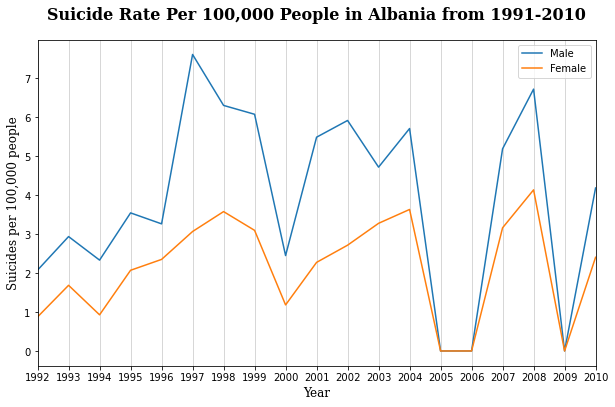

In [4]:
axisFont = {
    'family': 'serif',
    'color':  'black',
    'weight': 'normal',
    'size': 12,
}

titleFont = {
    'family': 'serif',
    'color':  'black',
    'weight': 'bold',
    'size': 16,
}

plt.figure(figsize=(10, 6))
alb_data = data.loc[data["CountryCode"]=="ALB"]
years = alb_data["Year"].unique()
x_male = alb_data.loc[alb_data["Sex"] == "Male"]["DeathRatePer100K"].to_numpy()
x_female = alb_data.loc[alb_data["Sex"] == "Female"]["DeathRatePer100K"].to_numpy()

plt.xticks(years)
plt.grid(axis="x", lw=.5)
plt.xlim(1992, 2010)
plt.plot(years, x_male, label="Male")
plt.plot(years, x_female, label="Female")

plt.title("Suicide Rate Per 100,000 People in Albania from 1991-2010", fontdict=titleFont, pad=20)
plt.xlabel("Year", fontdict=axisFont)
plt.ylabel("Suicides per 100,000 people", fontdict=axisFont)

plt.legend(loc=0)

plt.savefig("graphs/alb_per100k.png")

for loop to generate graphs for each country

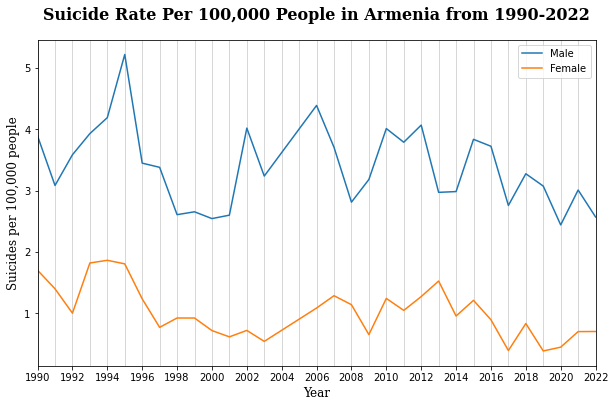

<Figure size 432x288 with 0 Axes>

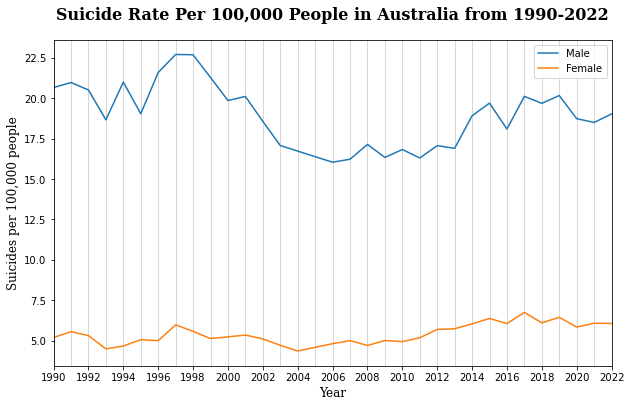

<Figure size 432x288 with 0 Axes>

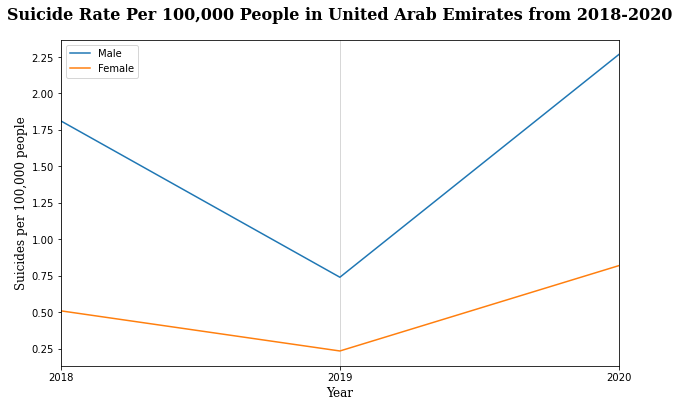

<Figure size 432x288 with 0 Axes>

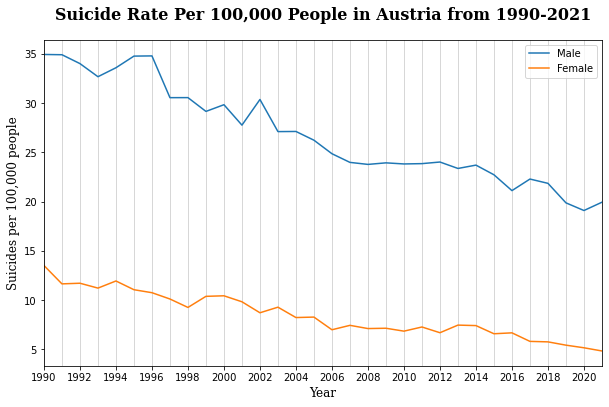

<Figure size 432x288 with 0 Axes>

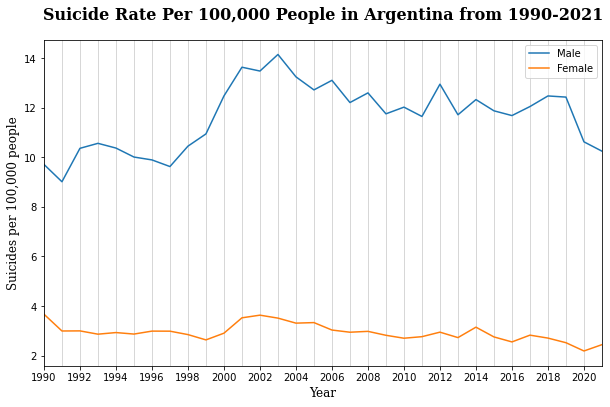

<Figure size 432x288 with 0 Axes>

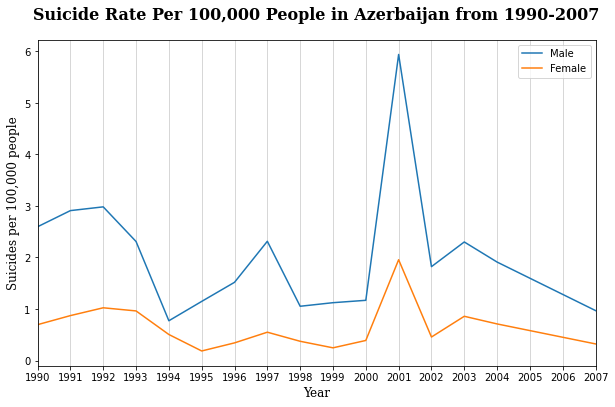

<Figure size 432x288 with 0 Axes>

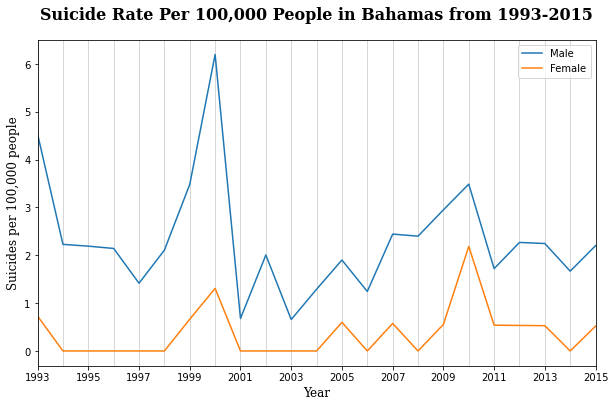

<Figure size 432x288 with 0 Axes>

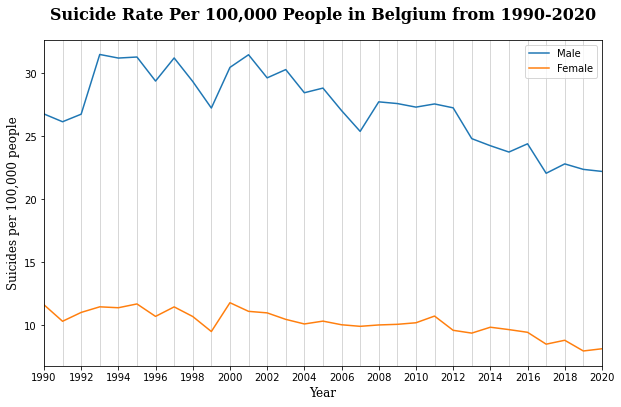

<Figure size 432x288 with 0 Axes>

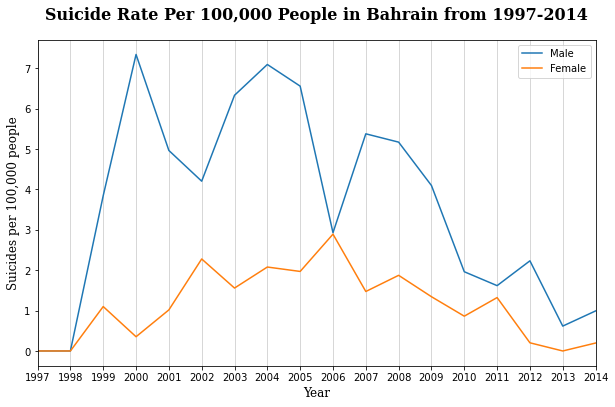

<Figure size 432x288 with 0 Axes>

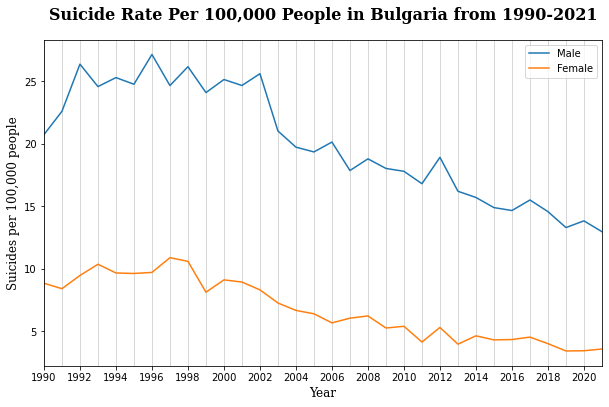

<Figure size 432x288 with 0 Axes>

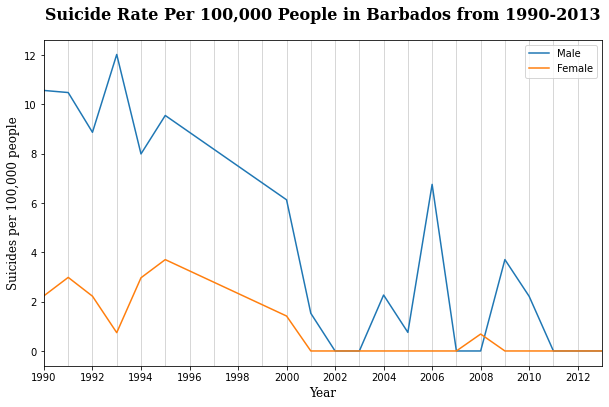

<Figure size 432x288 with 0 Axes>

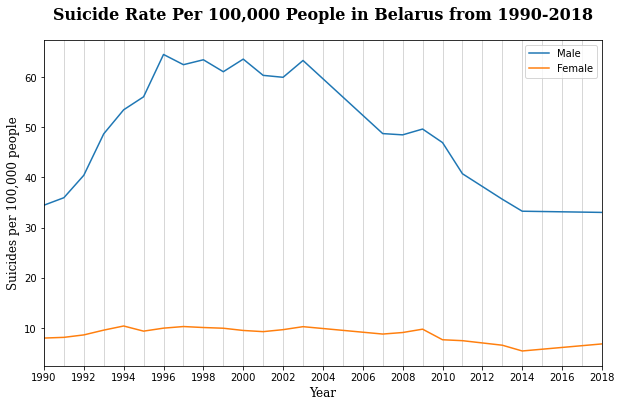

<Figure size 432x288 with 0 Axes>

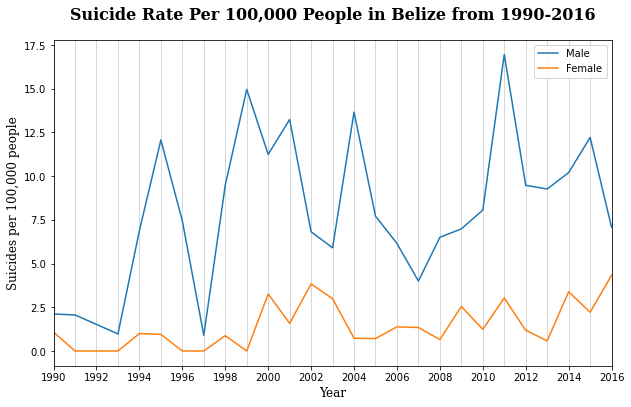

<Figure size 432x288 with 0 Axes>

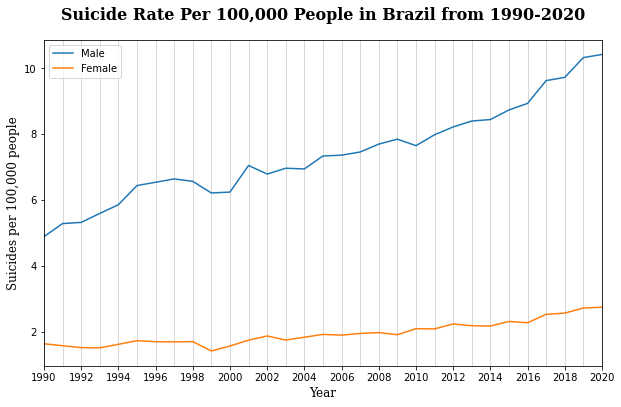

<Figure size 432x288 with 0 Axes>

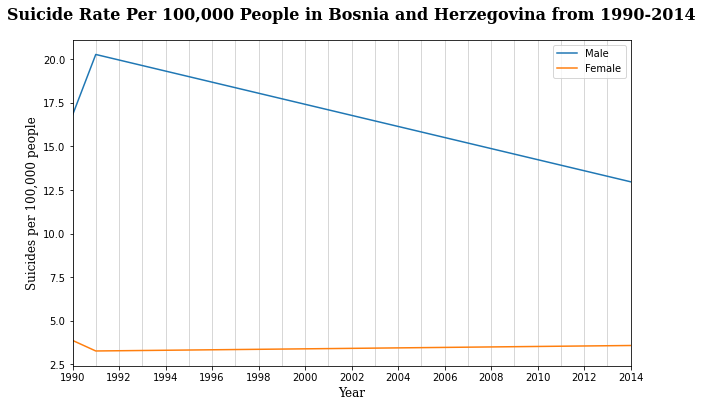

<Figure size 432x288 with 0 Axes>

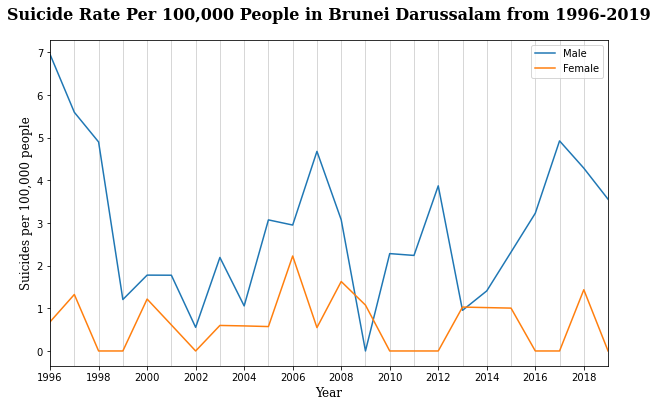

/tmp/ipykernel_16481/1020482856.py:10: UserWarning: Attempting to set identical left == right == 2011 results in singular transformations; automatically expanding.
  plt.xlim(min(years), (max(years)))


<Figure size 432x288 with 0 Axes>

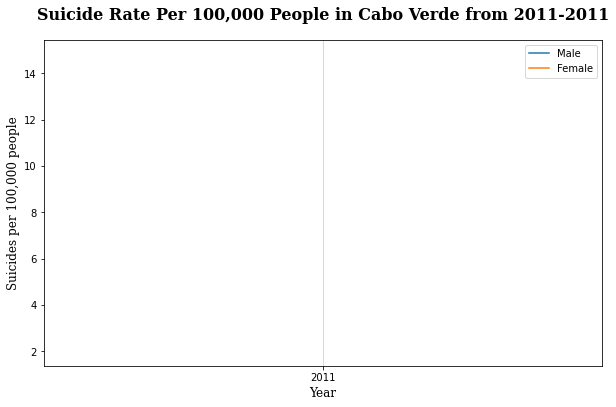

<Figure size 432x288 with 0 Axes>

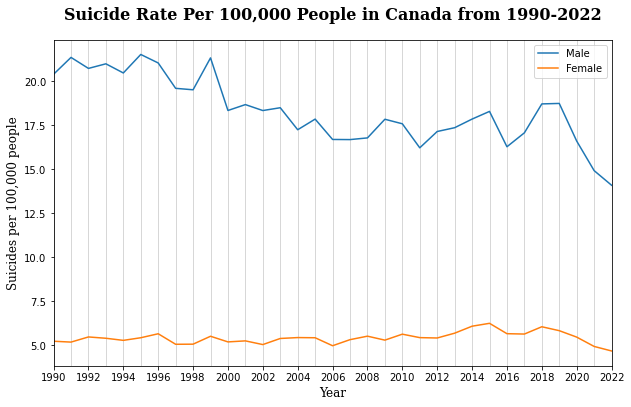

<Figure size 432x288 with 0 Axes>

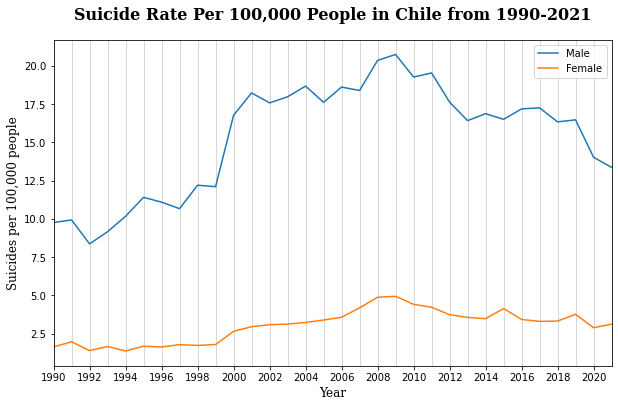

<Figure size 432x288 with 0 Axes>

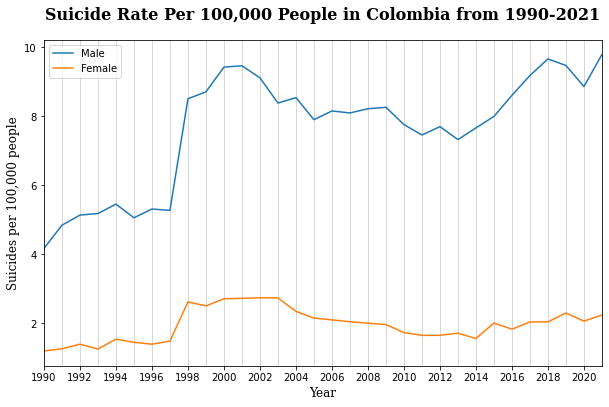

<Figure size 432x288 with 0 Axes>

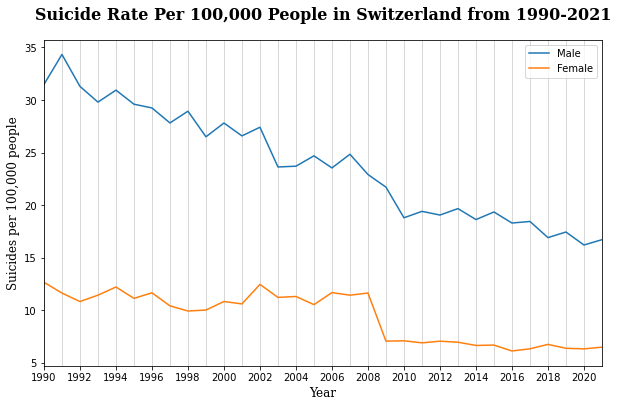

<Figure size 432x288 with 0 Axes>

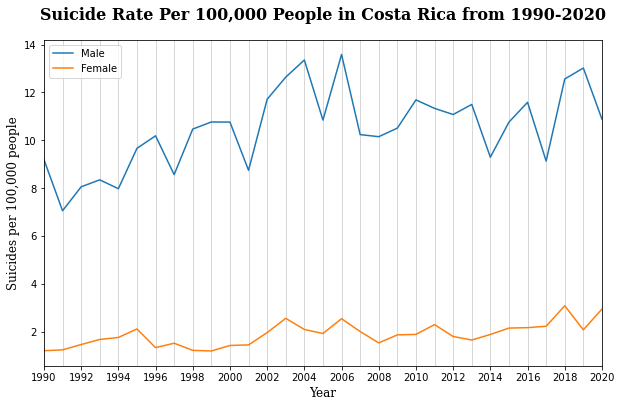

<Figure size 432x288 with 0 Axes>

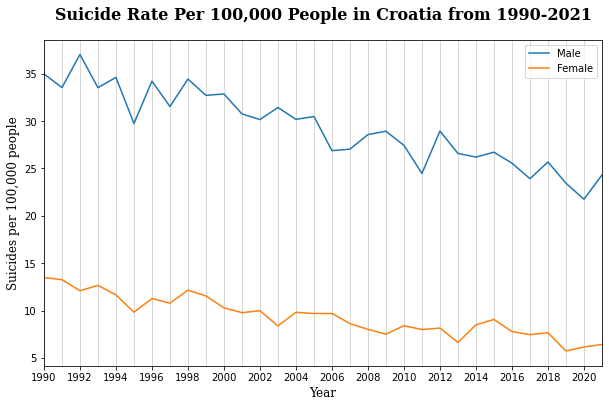

<Figure size 432x288 with 0 Axes>

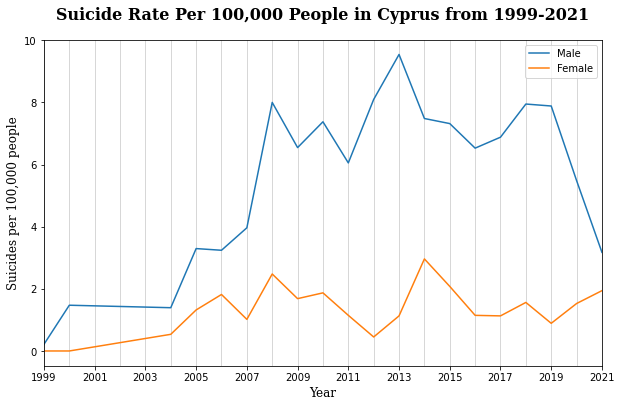

<Figure size 432x288 with 0 Axes>

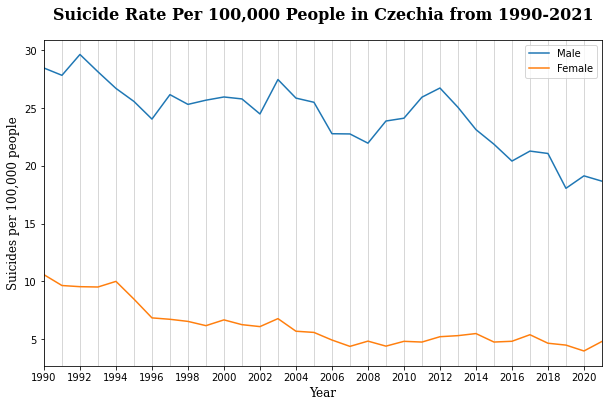

<Figure size 432x288 with 0 Axes>

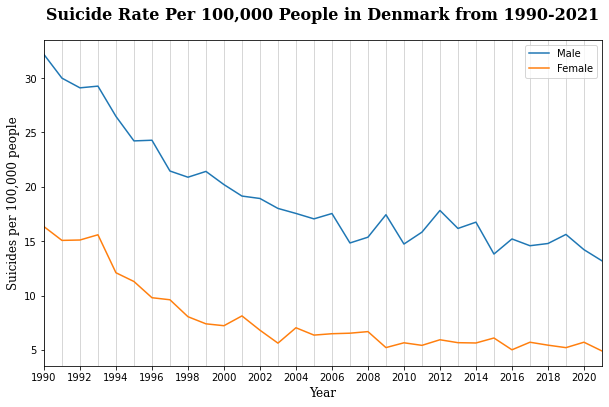

<Figure size 432x288 with 0 Axes>

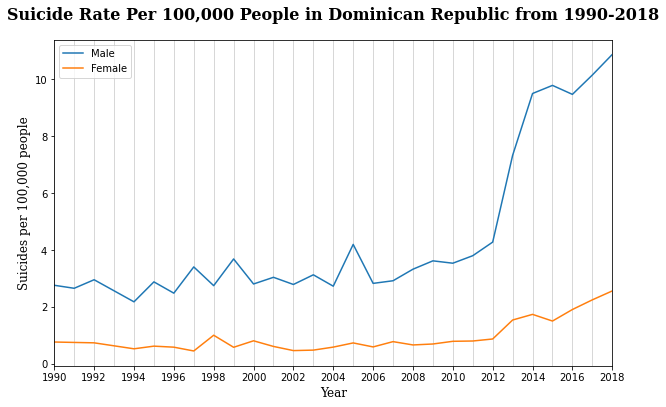

<Figure size 432x288 with 0 Axes>

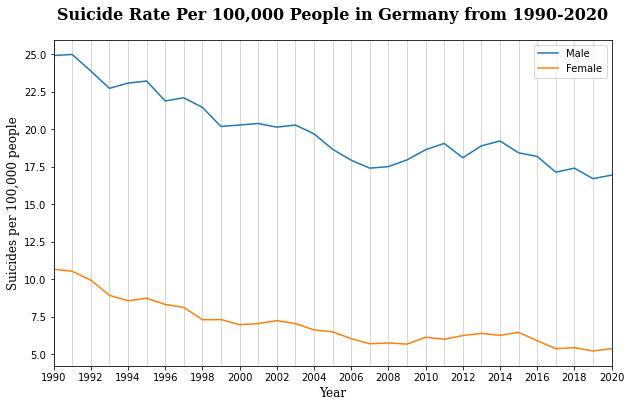

<Figure size 432x288 with 0 Axes>

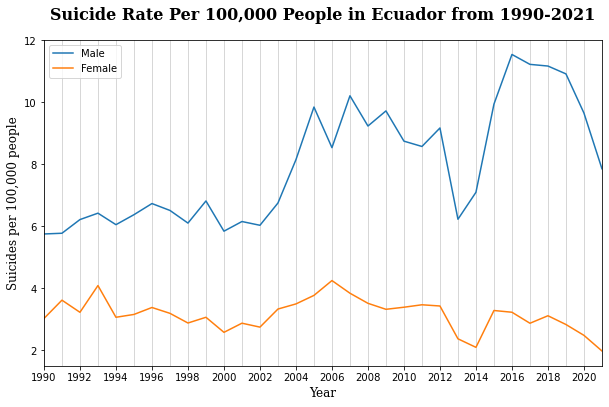

<Figure size 432x288 with 0 Axes>

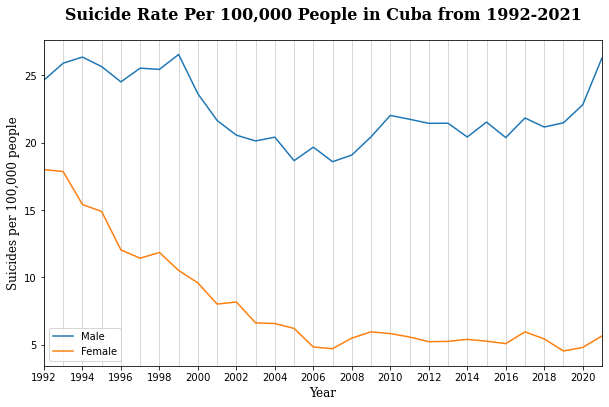

<Figure size 432x288 with 0 Axes>

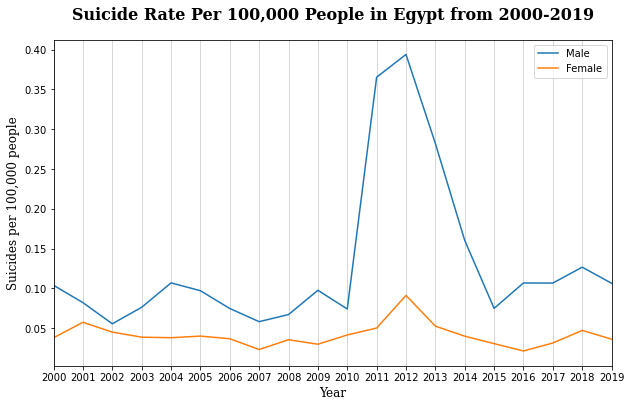

<Figure size 432x288 with 0 Axes>

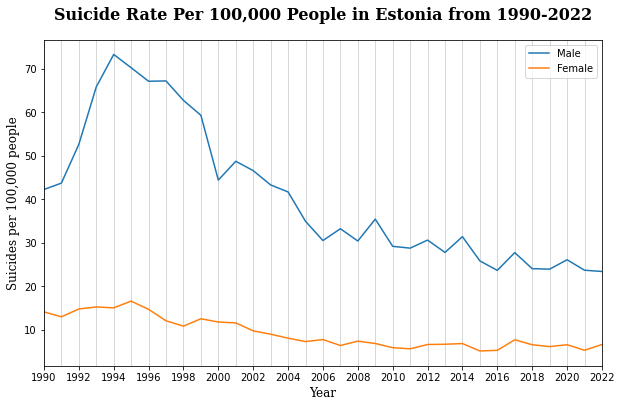

<Figure size 432x288 with 0 Axes>

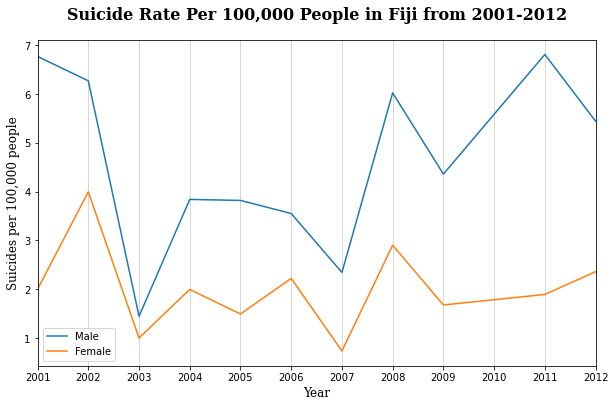

<Figure size 432x288 with 0 Axes>

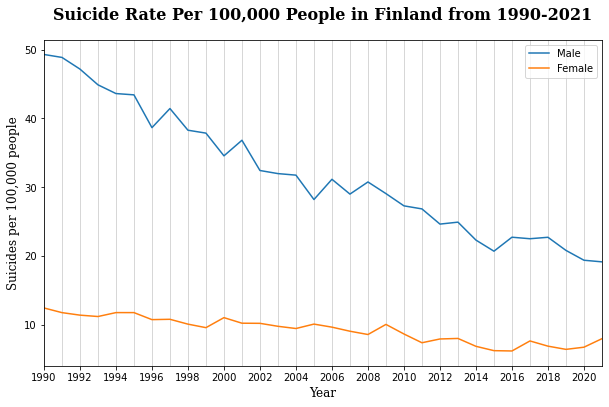

<Figure size 432x288 with 0 Axes>

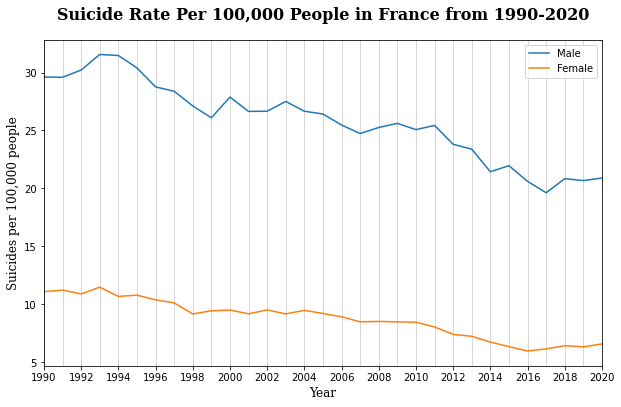

<Figure size 432x288 with 0 Axes>

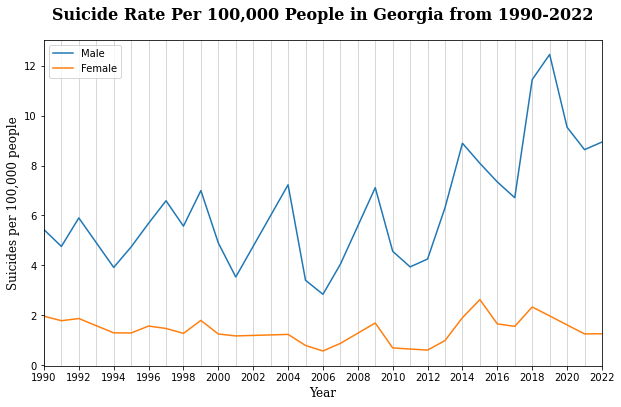

<Figure size 432x288 with 0 Axes>

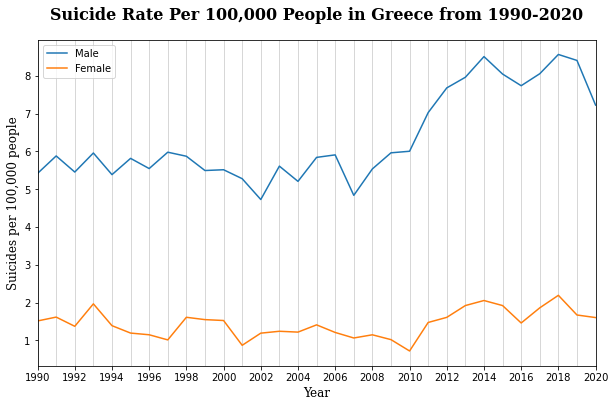

<Figure size 432x288 with 0 Axes>

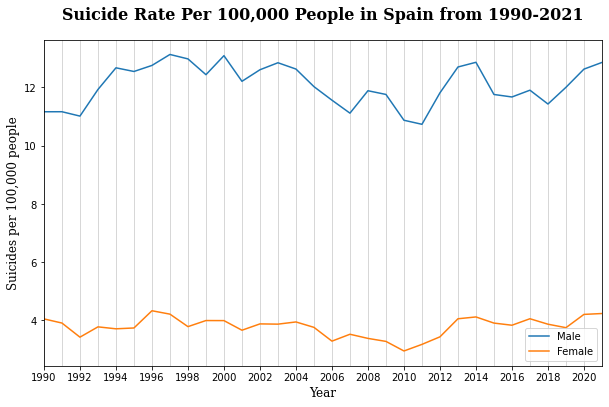

<Figure size 432x288 with 0 Axes>

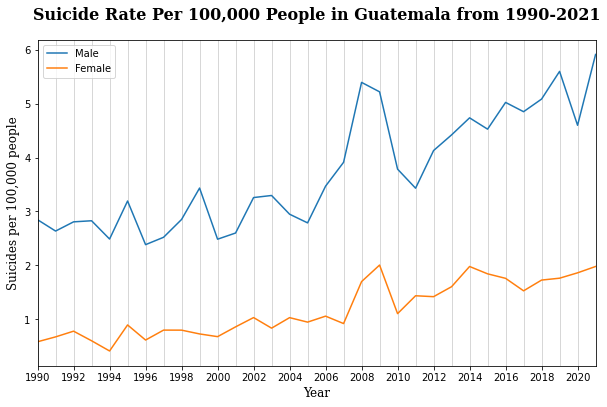

<Figure size 432x288 with 0 Axes>

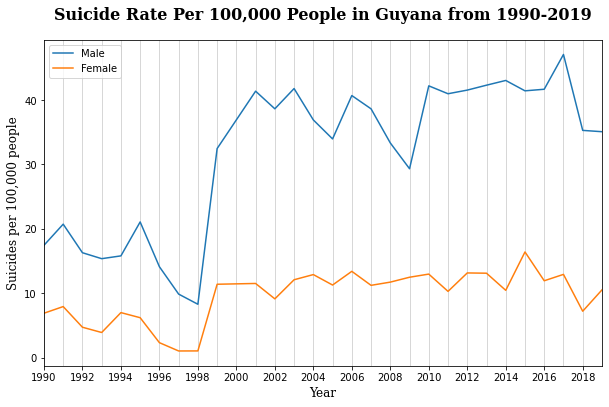

<Figure size 432x288 with 0 Axes>

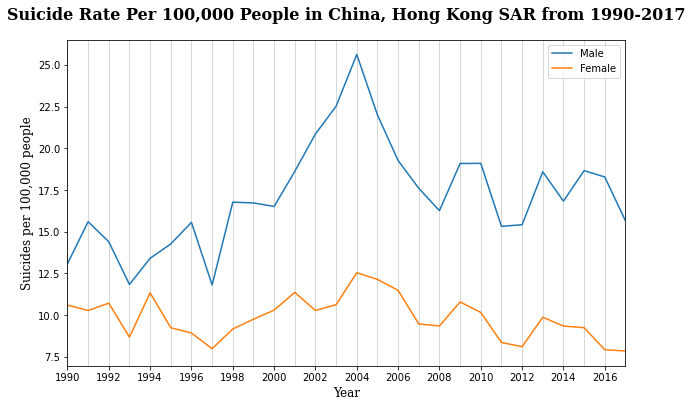

<Figure size 432x288 with 0 Axes>

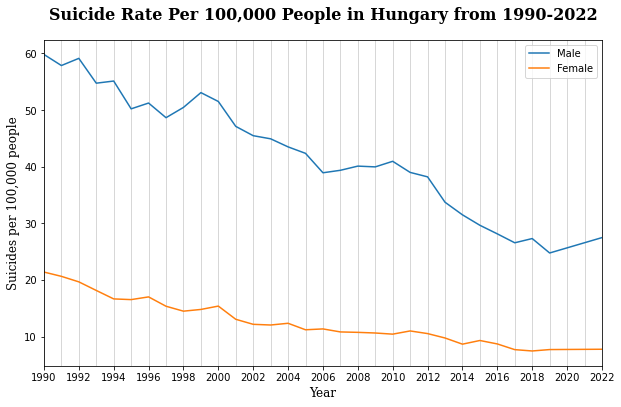

<Figure size 432x288 with 0 Axes>

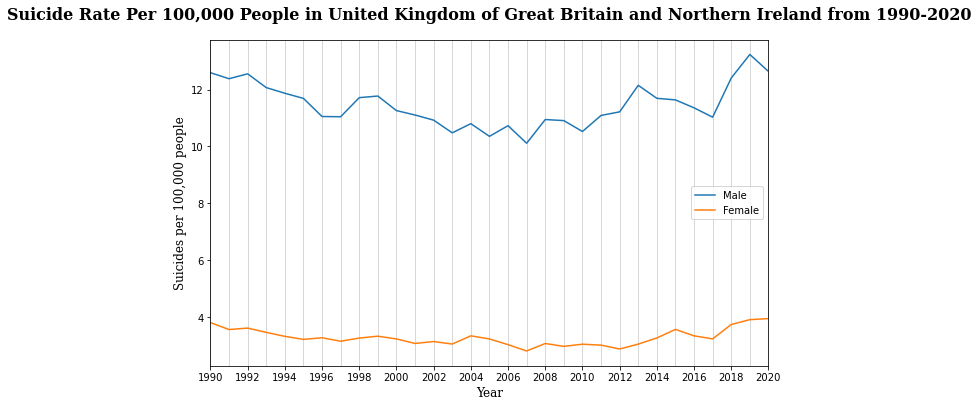

<Figure size 432x288 with 0 Axes>

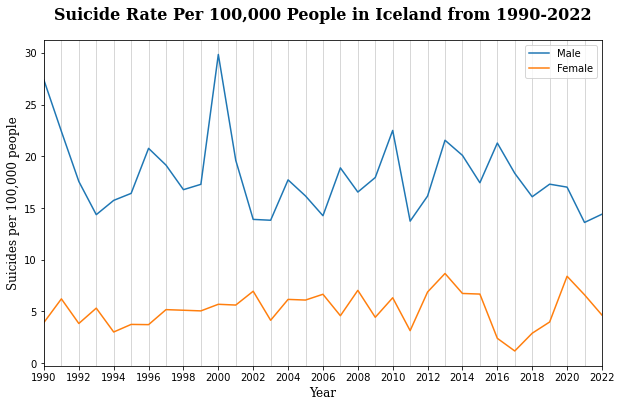

<Figure size 432x288 with 0 Axes>

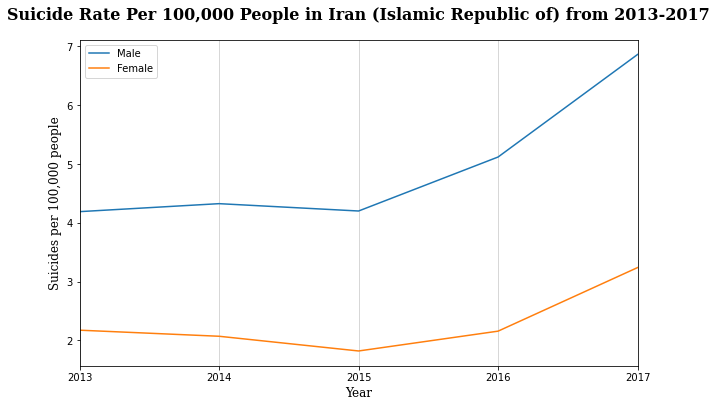

<Figure size 432x288 with 0 Axes>

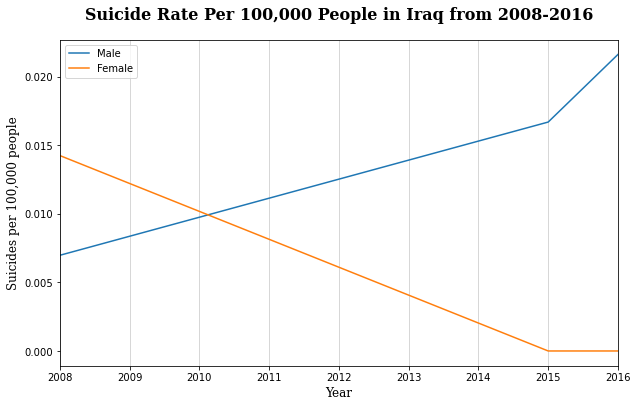

<Figure size 432x288 with 0 Axes>

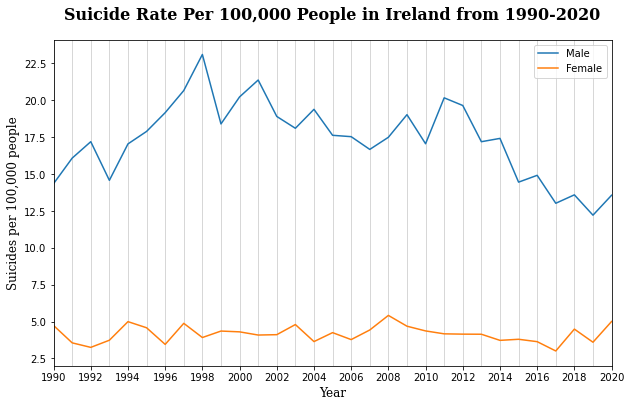

<Figure size 432x288 with 0 Axes>

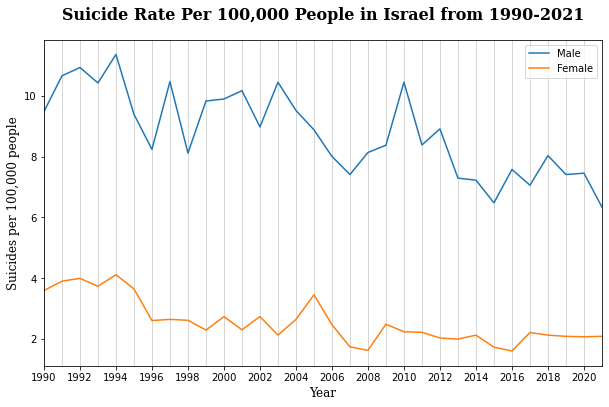

<Figure size 432x288 with 0 Axes>

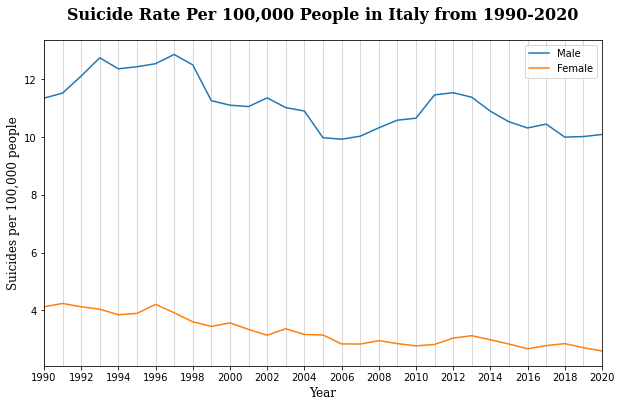

<Figure size 432x288 with 0 Axes>

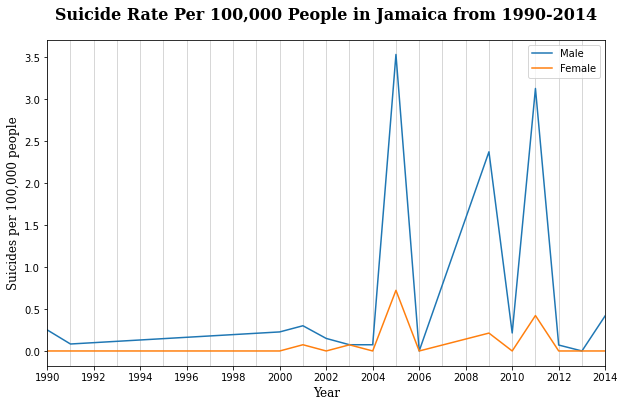

<Figure size 432x288 with 0 Axes>

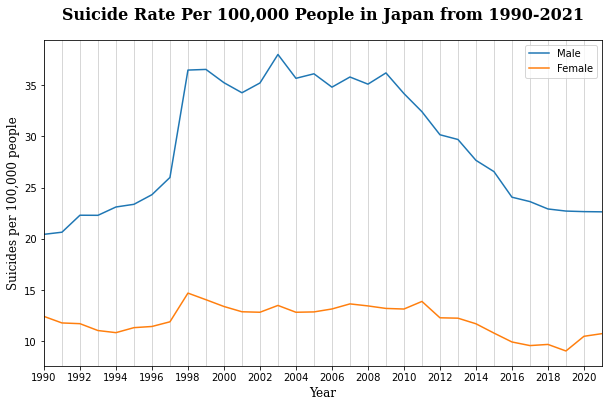

<Figure size 432x288 with 0 Axes>

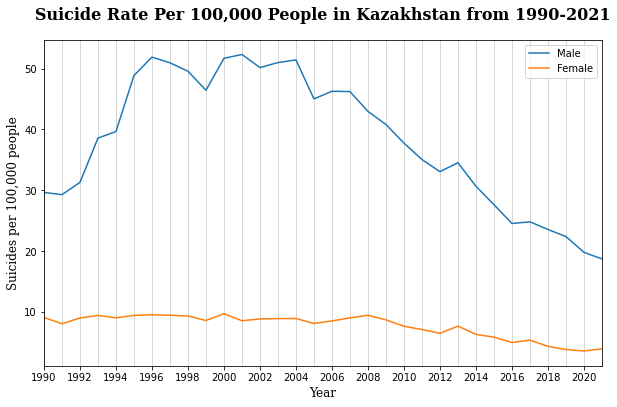

<Figure size 432x288 with 0 Axes>

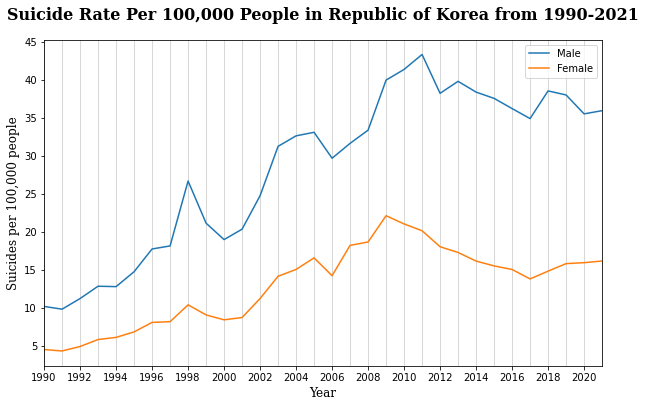

<Figure size 432x288 with 0 Axes>

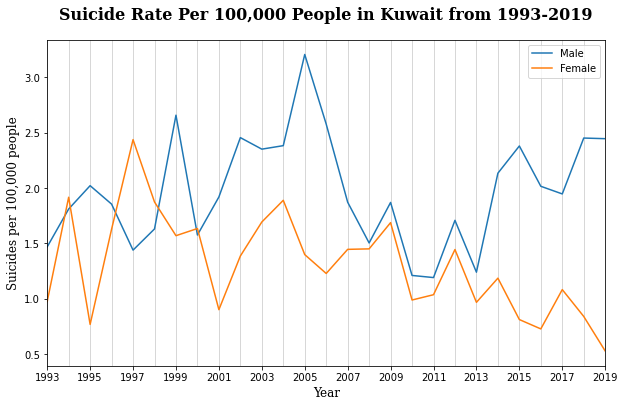

<Figure size 432x288 with 0 Axes>

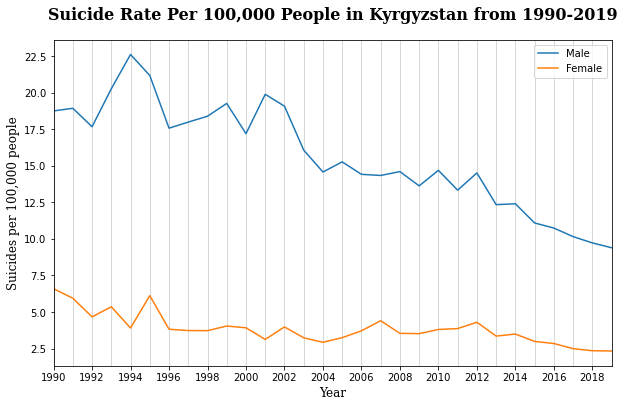

<Figure size 432x288 with 0 Axes>

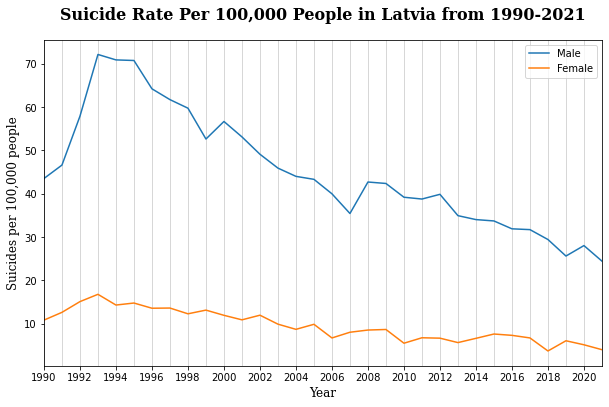

<Figure size 432x288 with 0 Axes>

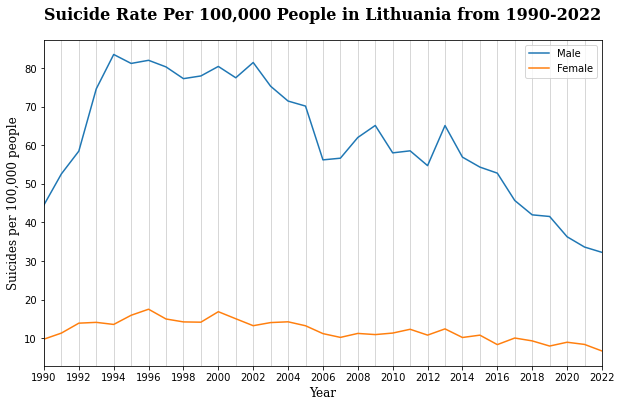

<Figure size 432x288 with 0 Axes>

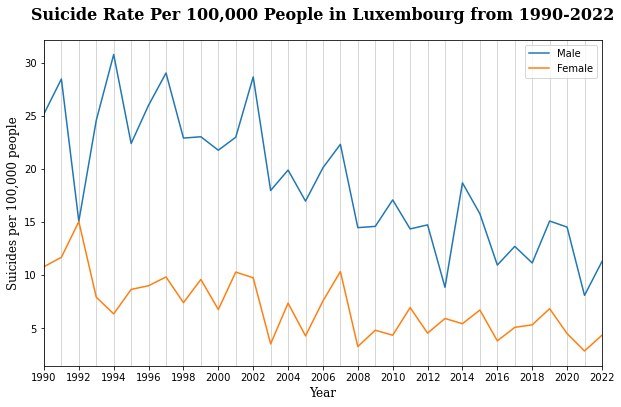

<Figure size 432x288 with 0 Axes>

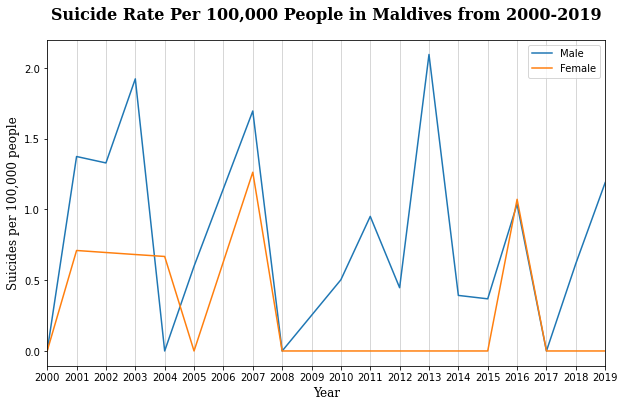

<Figure size 432x288 with 0 Axes>

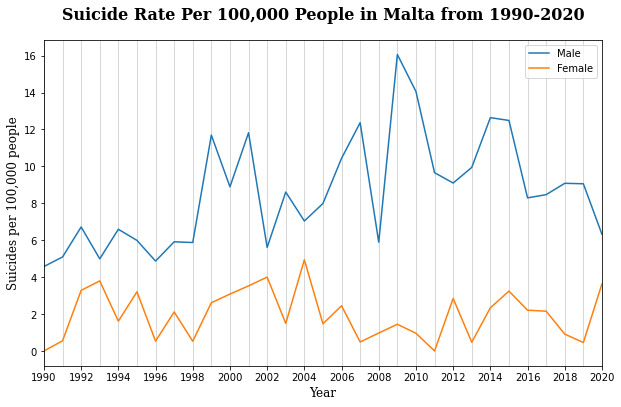

<Figure size 432x288 with 0 Axes>

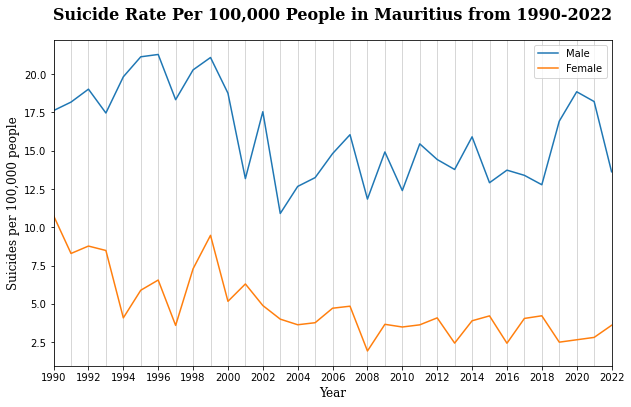

<Figure size 432x288 with 0 Axes>

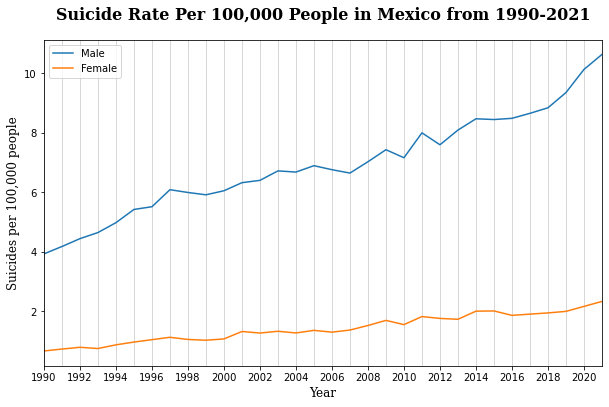

<Figure size 432x288 with 0 Axes>

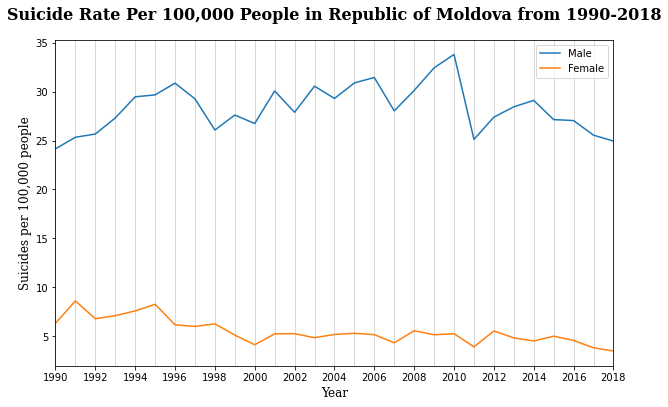

<Figure size 432x288 with 0 Axes>

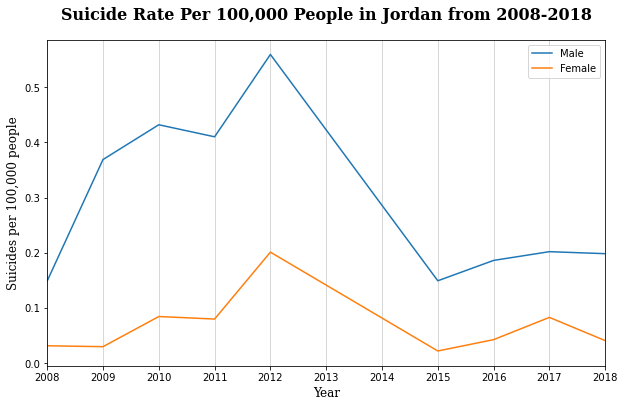

<Figure size 432x288 with 0 Axes>

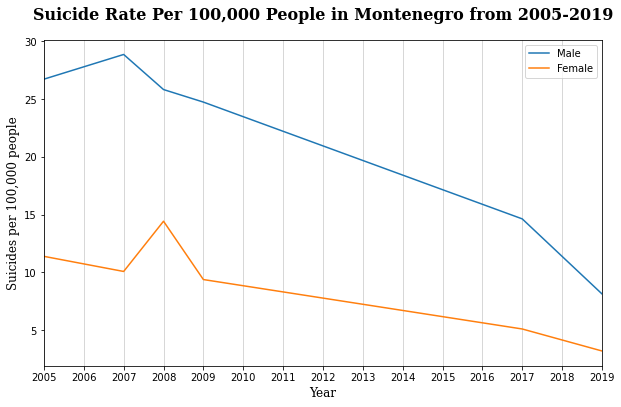

<Figure size 432x288 with 0 Axes>

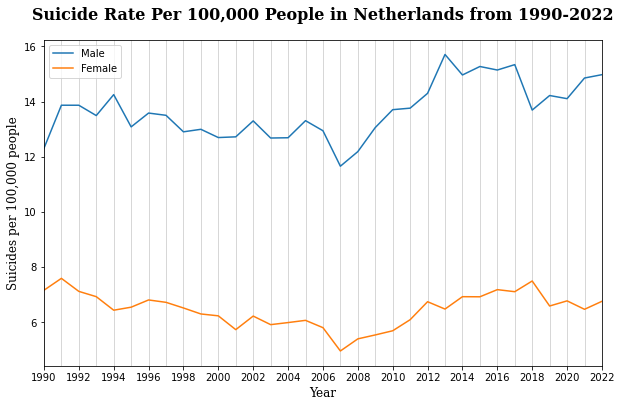

<Figure size 432x288 with 0 Axes>

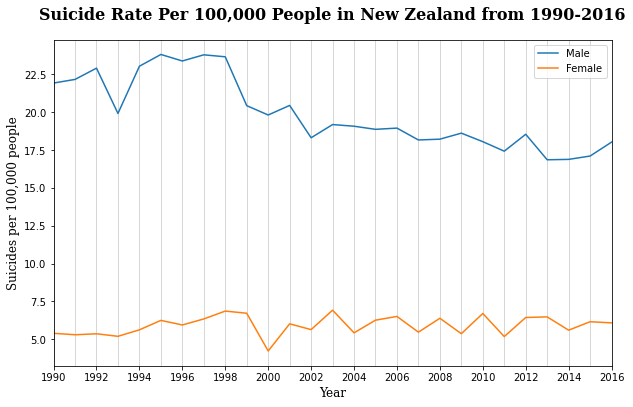

<Figure size 432x288 with 0 Axes>

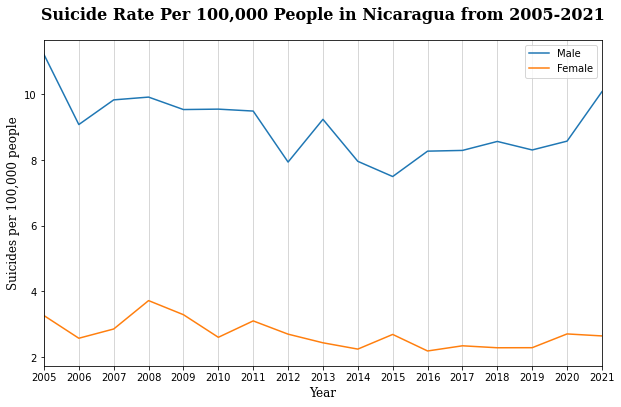

<Figure size 432x288 with 0 Axes>

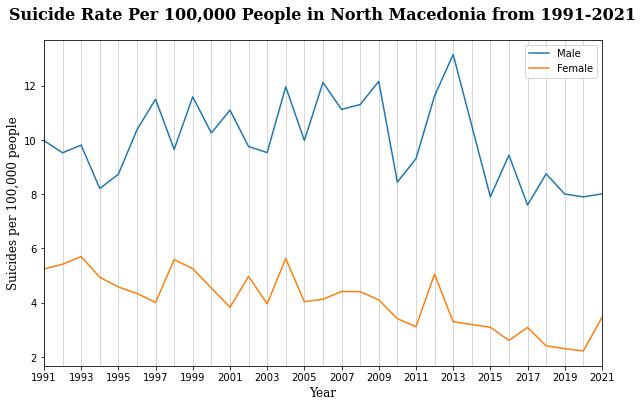

<Figure size 432x288 with 0 Axes>

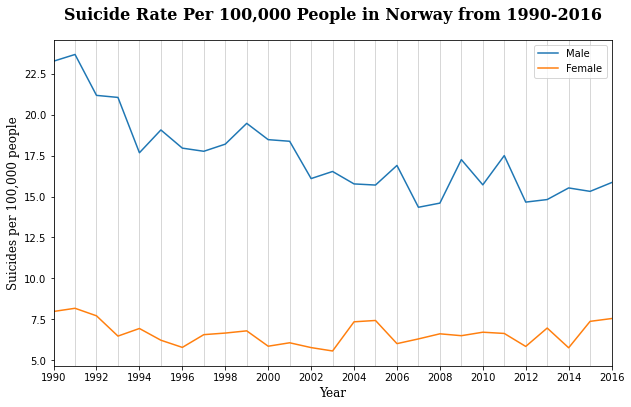

<Figure size 432x288 with 0 Axes>

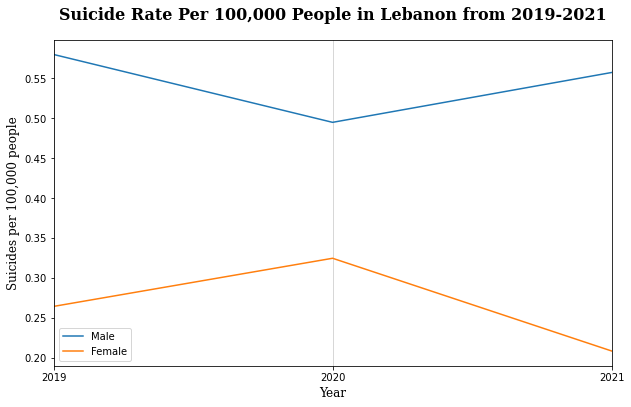

<Figure size 432x288 with 0 Axes>

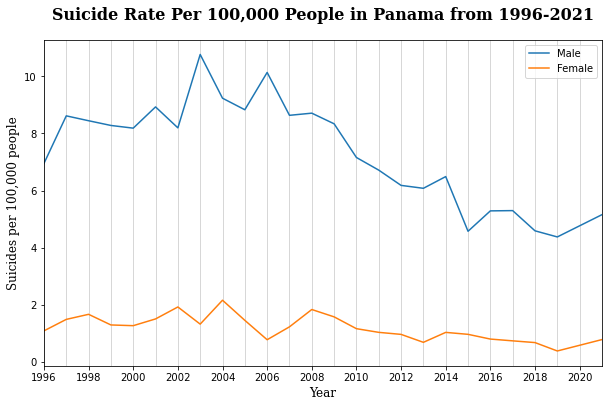

<Figure size 432x288 with 0 Axes>

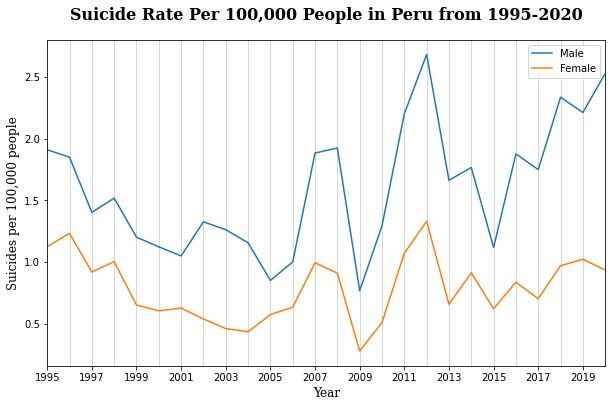

<Figure size 432x288 with 0 Axes>

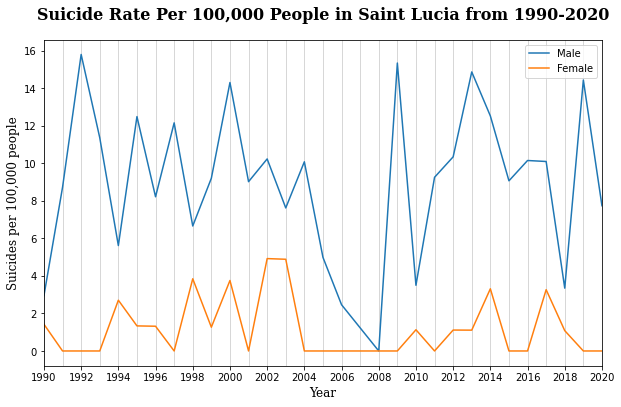

<Figure size 432x288 with 0 Axes>

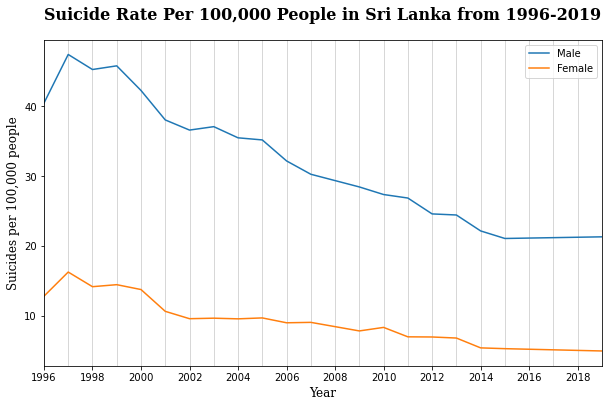

<Figure size 432x288 with 0 Axes>

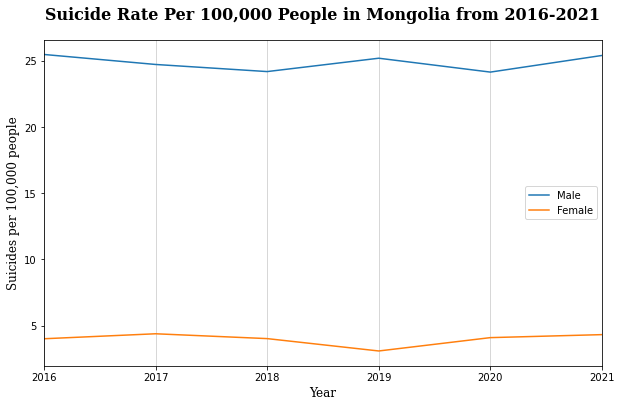

<Figure size 432x288 with 0 Axes>

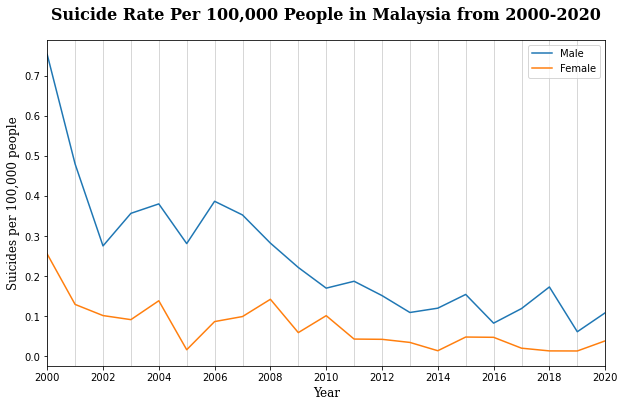

<Figure size 432x288 with 0 Axes>

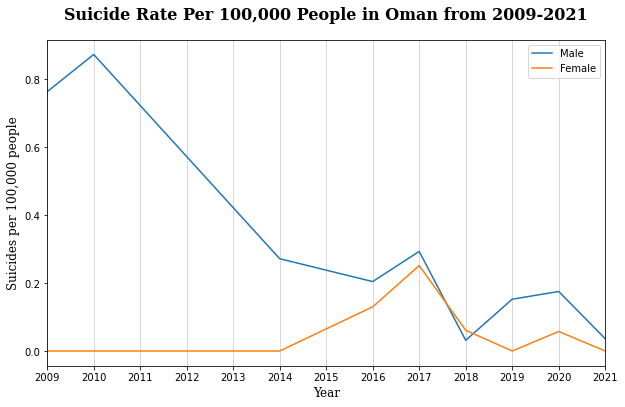

<Figure size 432x288 with 0 Axes>

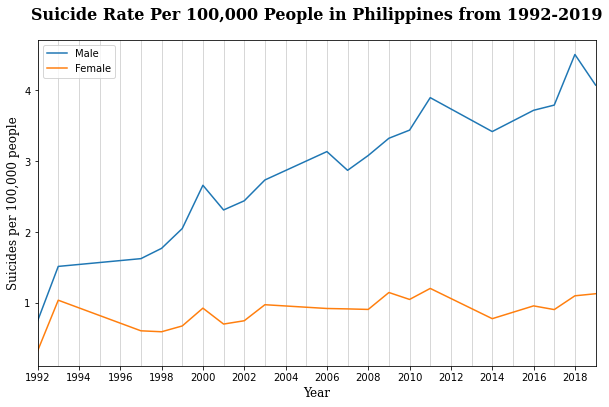

<Figure size 432x288 with 0 Axes>

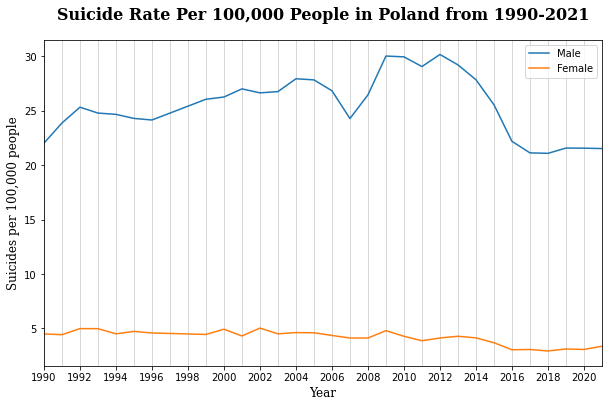

<Figure size 432x288 with 0 Axes>

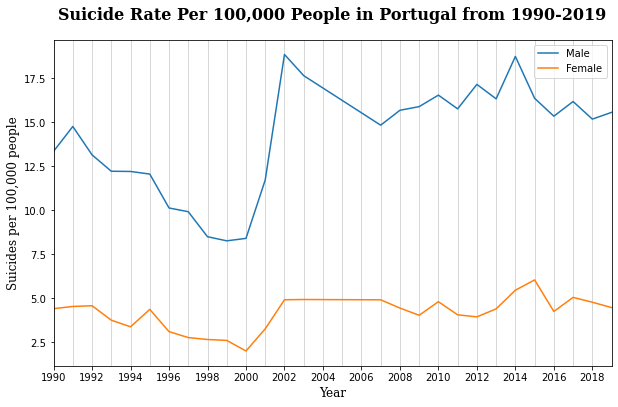

<Figure size 432x288 with 0 Axes>

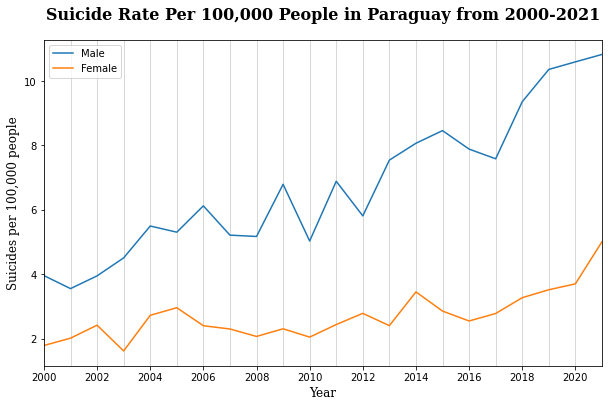

<Figure size 432x288 with 0 Axes>

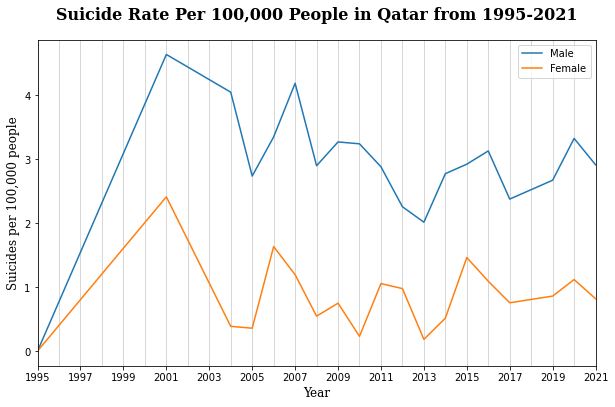

<Figure size 432x288 with 0 Axes>

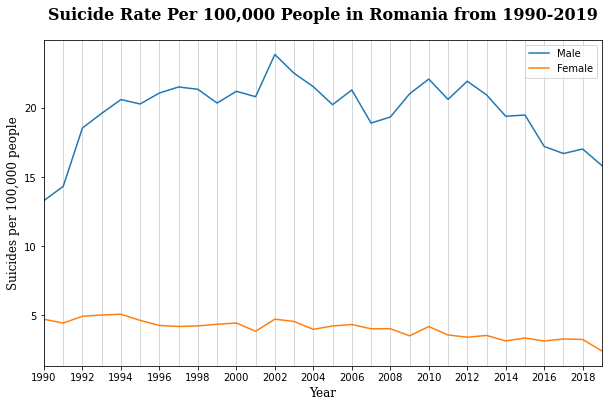

<Figure size 432x288 with 0 Axes>

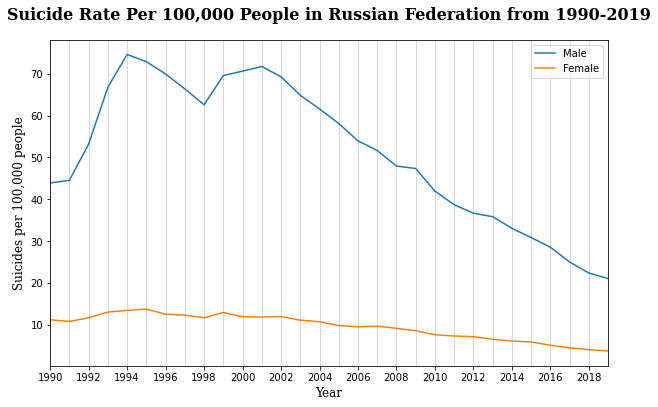

<Figure size 432x288 with 0 Axes>

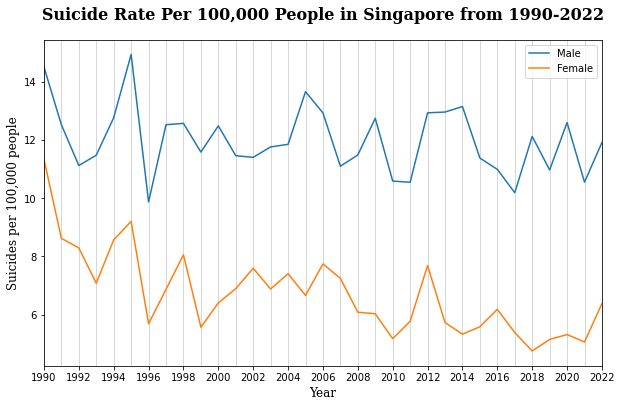

<Figure size 432x288 with 0 Axes>

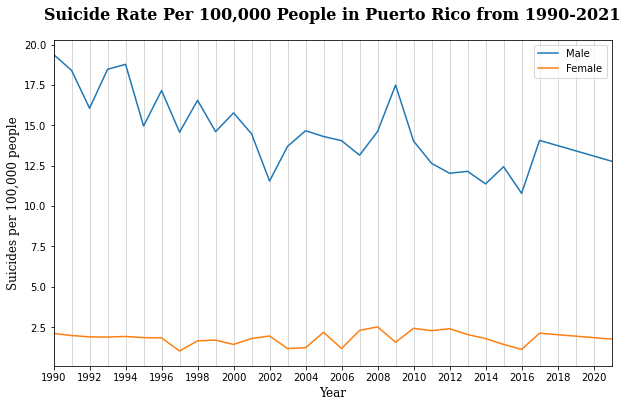

<Figure size 432x288 with 0 Axes>

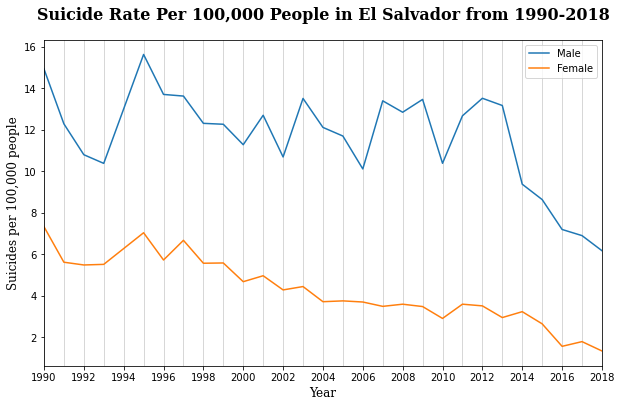

<Figure size 432x288 with 0 Axes>

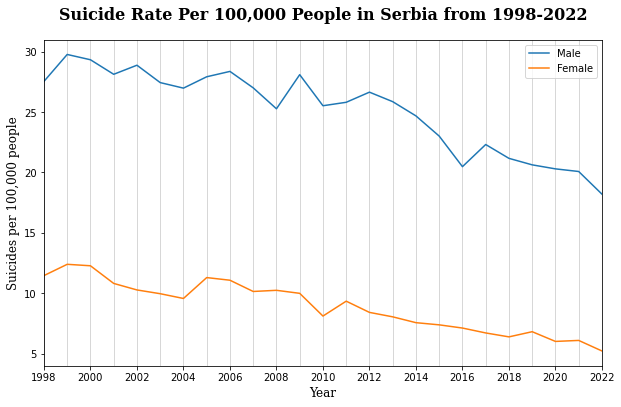

<Figure size 432x288 with 0 Axes>

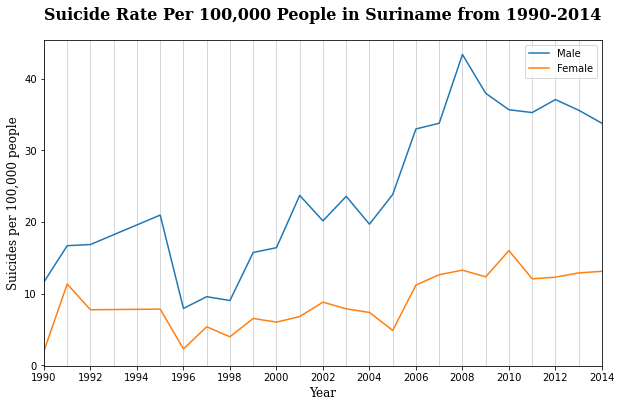

<Figure size 432x288 with 0 Axes>

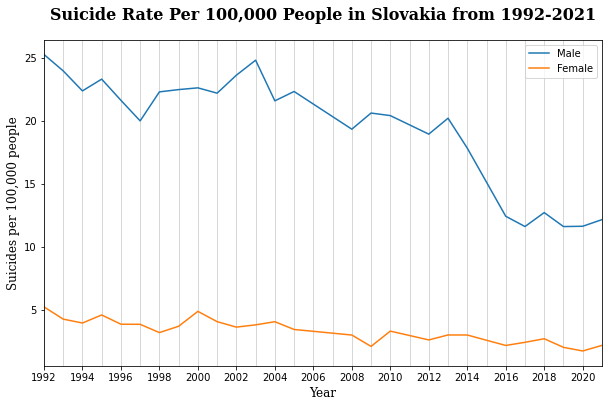

<Figure size 432x288 with 0 Axes>

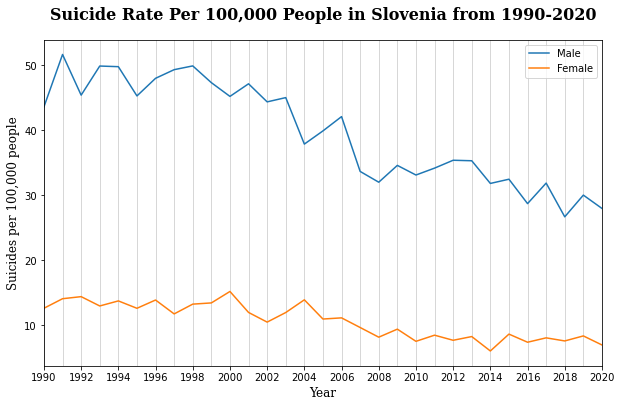

<Figure size 432x288 with 0 Axes>

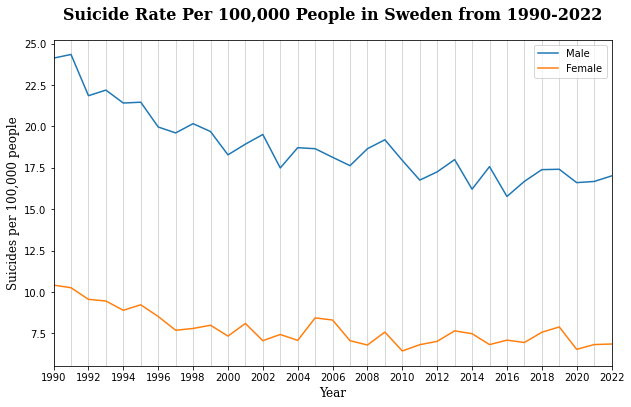

<Figure size 432x288 with 0 Axes>

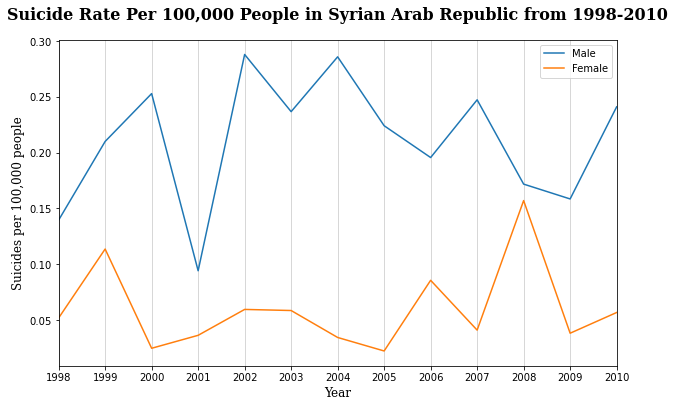

<Figure size 432x288 with 0 Axes>

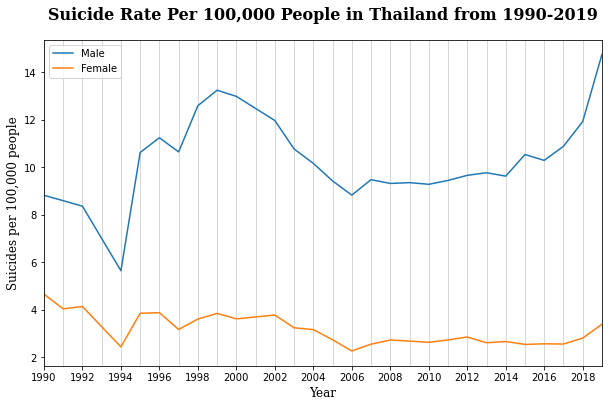

<Figure size 432x288 with 0 Axes>

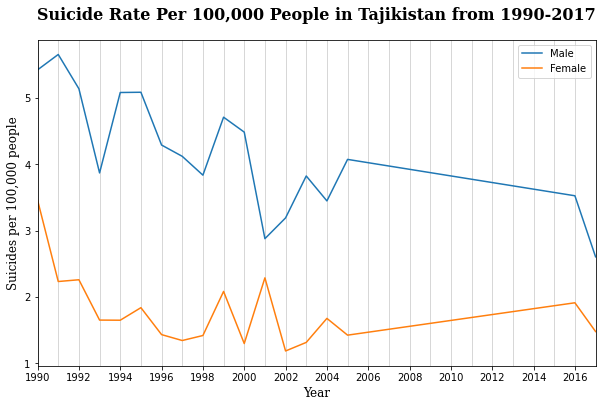

<Figure size 432x288 with 0 Axes>

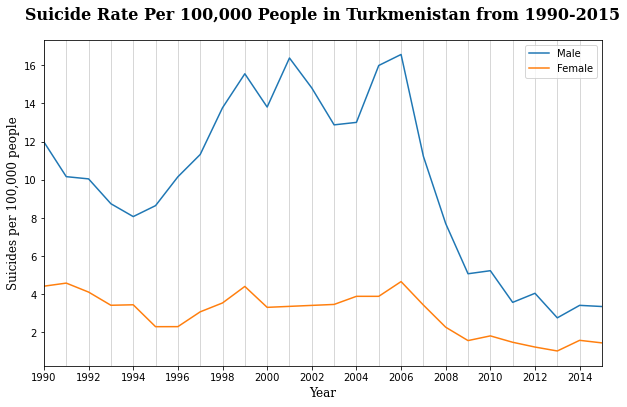

<Figure size 432x288 with 0 Axes>

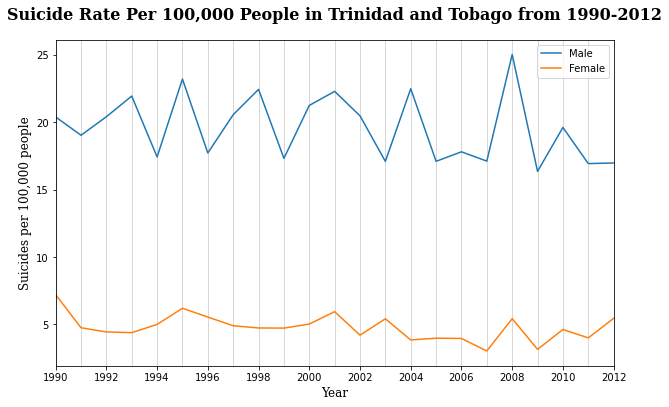

<Figure size 432x288 with 0 Axes>

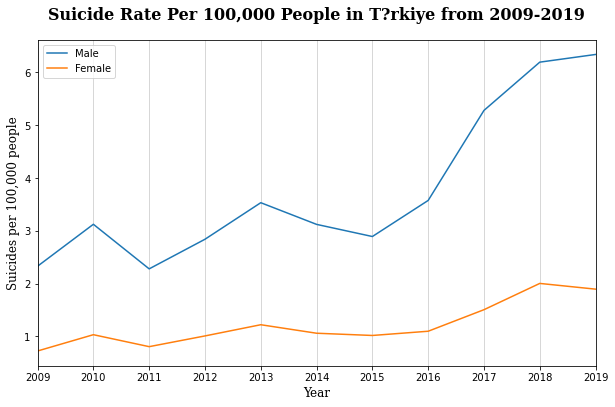

<Figure size 432x288 with 0 Axes>

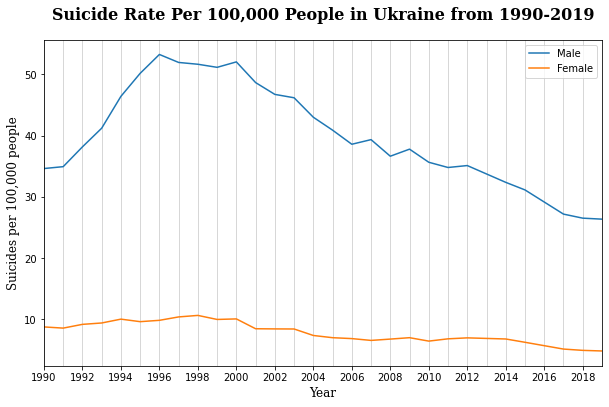

<Figure size 432x288 with 0 Axes>

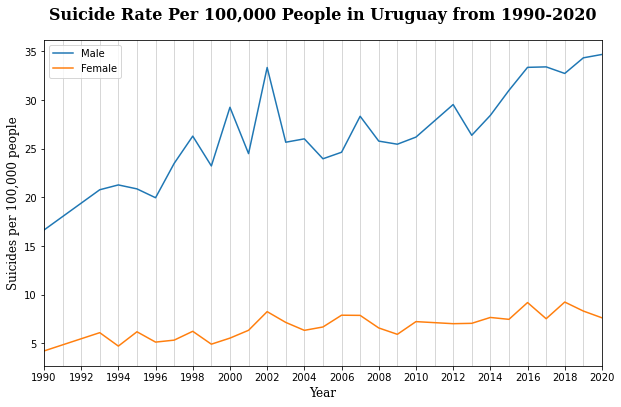

<Figure size 432x288 with 0 Axes>

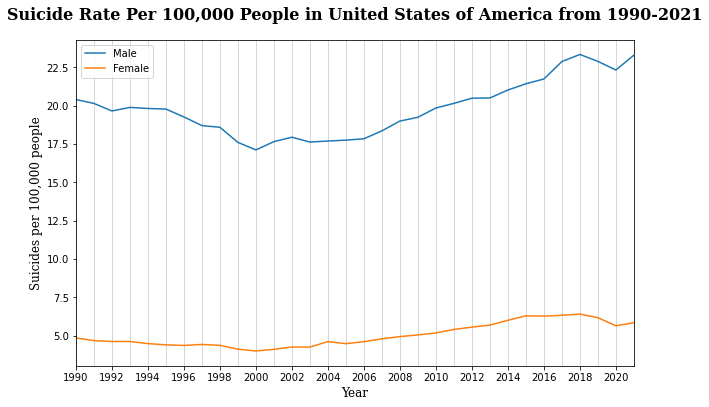

<Figure size 432x288 with 0 Axes>

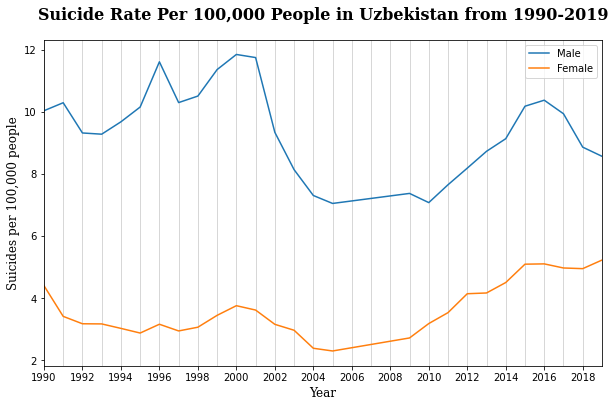

<Figure size 432x288 with 0 Axes>

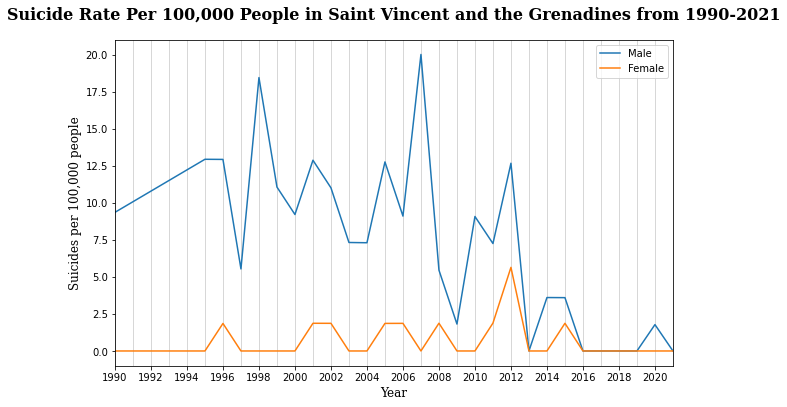

<Figure size 432x288 with 0 Axes>

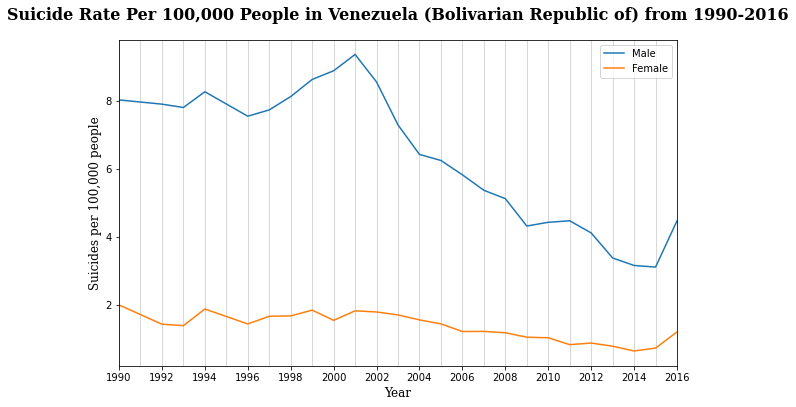

<Figure size 432x288 with 0 Axes>

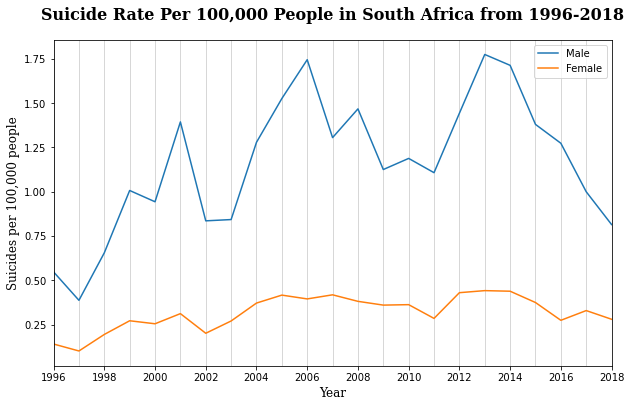

<Figure size 432x288 with 0 Axes>

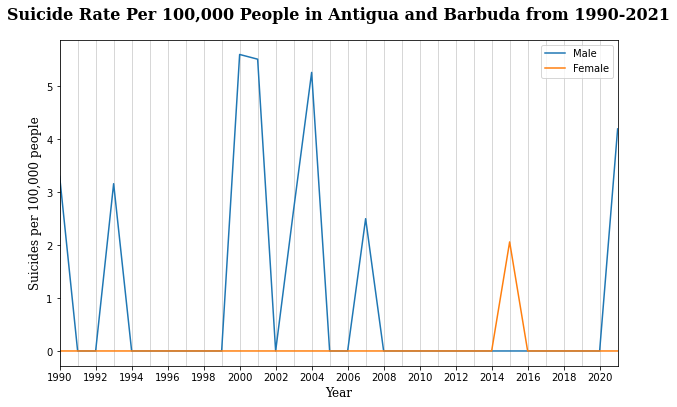

<Figure size 432x288 with 0 Axes>

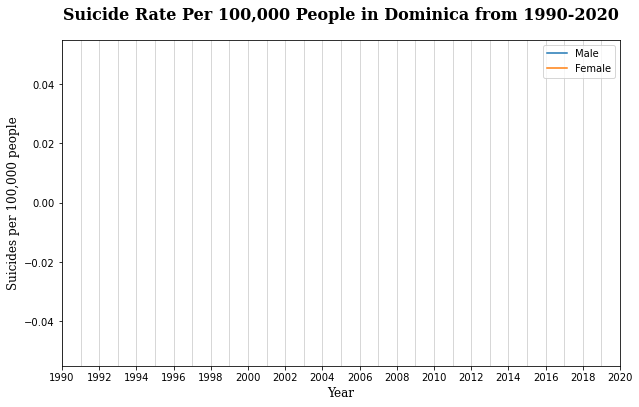

<Figure size 432x288 with 0 Axes>

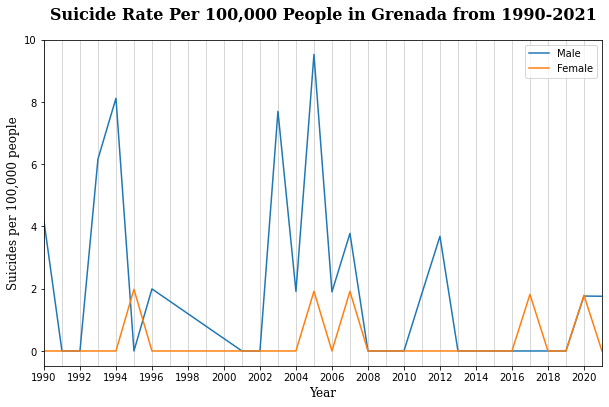

<Figure size 432x288 with 0 Axes>

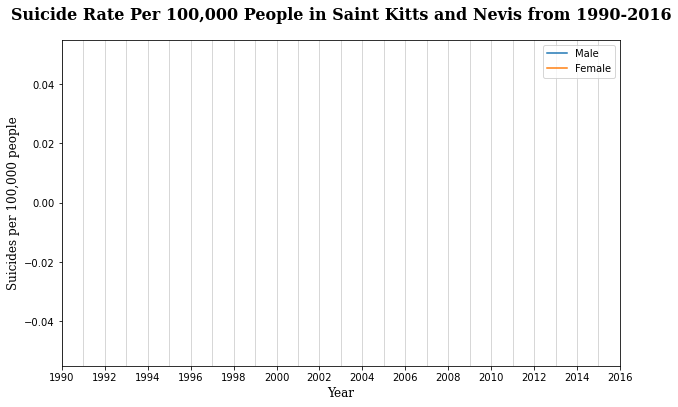

<Figure size 432x288 with 0 Axes>

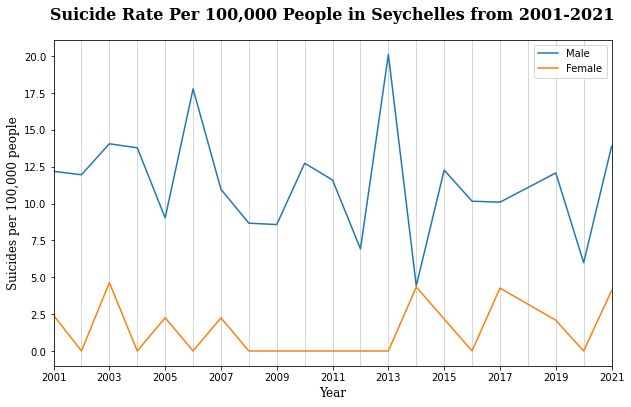

<Figure size 432x288 with 0 Axes>

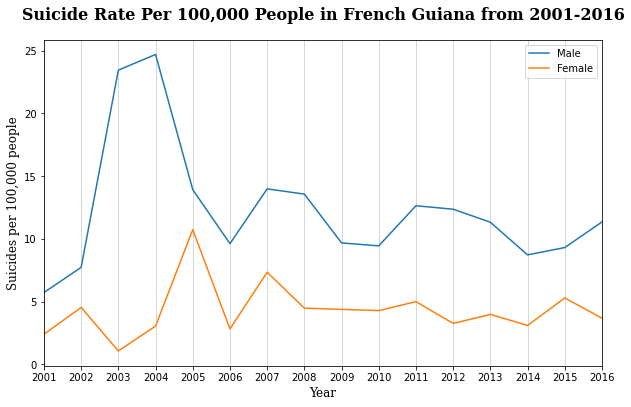

<Figure size 432x288 with 0 Axes>

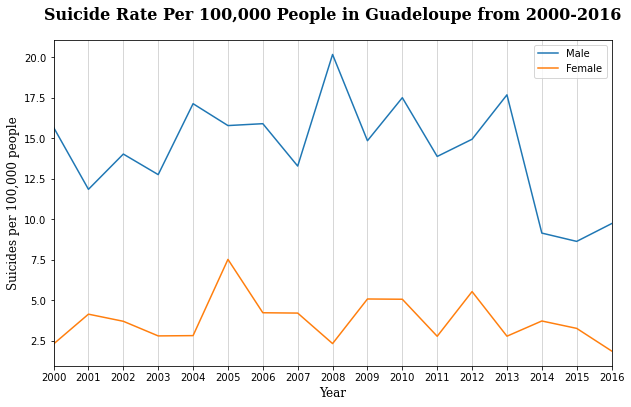

<Figure size 432x288 with 0 Axes>

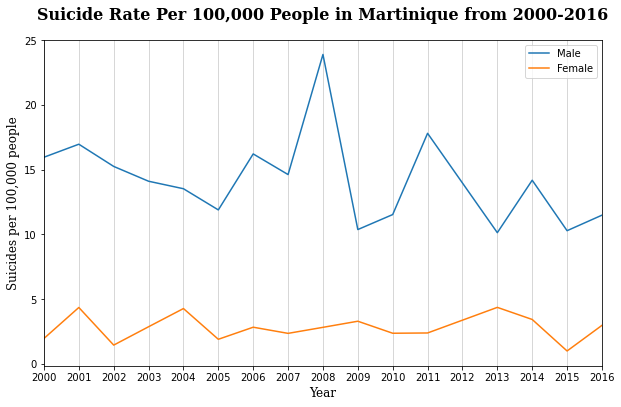

<Figure size 432x288 with 0 Axes>

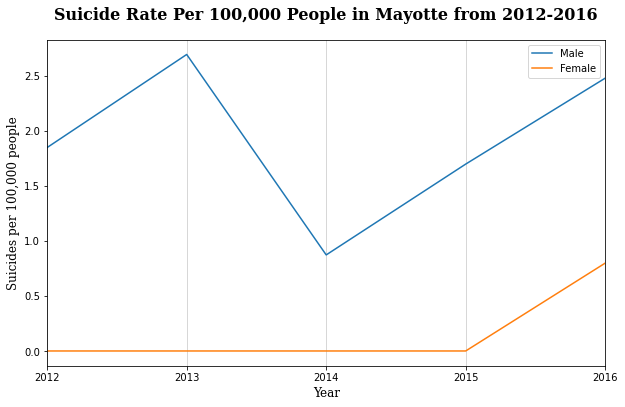

<Figure size 432x288 with 0 Axes>

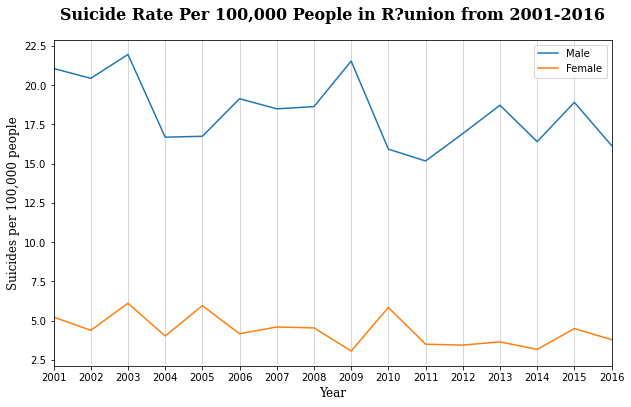

<Figure size 432x288 with 0 Axes>

In [41]:
country_codes = data["CountryCode"].unique()

for cc in country_codes[1:]:
    fig, ax = plt.subplots(figsize=(10, 6))
    c_data = data.loc[data["CountryCode"] == cc].sort_values("Year")
    years = c_data["Year"].unique()
    x_male = c_data.loc[c_data["Sex"] == "Male"]["DeathRatePer100K"].to_numpy()
    x_female = c_data.loc[c_data["Sex"] == "Female"]["DeathRatePer100K"].to_numpy()
    
    plt.xlim(min(years), (max(years)))
    if (max(years) - min(years)) >= 20:
        plt.xticks(range(min(years), max(years)+1, 2))
        plt.minorticks_on()
        plt.tick_params(which='minor', bottom=False, left=False)
        ax.xaxis.set_minor_locator(AutoMinorLocator(2))
    else:
        plt.xticks(range(min(years), max(years)+1))

    plt.grid(axis="x", lw=.5, which="both")
    
    plt.plot(years, x_male, label="Male")
    plt.plot(years, x_female, label="Female")
    

    plt.title(f"Suicide Rate Per 100,000 People in {c_data.iloc[0, 1]} from {min(years)}-{max(years)}", fontdict=titleFont, pad=20)
    plt.xlabel("Year", fontdict=axisFont)
    plt.ylabel("Suicides per 100,000 people", fontdict=axisFont)

    plt.legend(loc=0)
    
    plt.show()
    plt.savefig(f"graphs/{cc.lower()}_per100k.png")
    plt.close(fig)